In [1]:

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import seaborn as sns
from sklearn import preprocessing
import plotly.express as px
import plotly.graph_objects as go
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
# Load your CSV file into a DataFrame
df = pd.read_csv('Synthetic(CrossOver)DatasetDepression.csv')




In [3]:
df

,Index,days,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,0,4,1,1,2,2,2,1,2,24,25
1,1,6,2,3,3,2,1,2,2,29,15
2,2,7,2,5,1,2,2,2,2,24,15
3,3,4,2,3,1,2,2,2,2,24,25
4,4,2,1,2,2,2,1,1,2,19,19
...,...,...,...,...,...,...,...,...,...,...,...
647,647,5,1,2,2,1,1,1,2,27,25
648,648,4,2,4,2,2,2,1,2,14,18
649,649,4,2,3,1,2,1,2,2,24,21
650,650,2,2,3,1,2,2,2,2,19,11


In [4]:
df.drop(['Index'],axis=1,inplace=True)

In [5]:
df.isnull().sum()

days         0
gender       0
age          0
afftype      0
melanch      0
inpatient    0
marriage     0
work         0
madrs1       0
madrs2       0
dtype: int64

In [6]:
df.head()

,days,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,4,1,1,2,2,2,1,2,24,25
1,6,2,3,3,2,1,2,2,29,15
2,7,2,5,1,2,2,2,2,24,15
3,4,2,3,1,2,2,2,2,24,25
4,2,1,2,2,2,1,1,2,19,19


In [7]:
#df.dropna(inplace=True)  

In [8]:
df.isnull().sum()

days         0
gender       0
age          0
afftype      0
melanch      0
inpatient    0
marriage     0
work         0
madrs1       0
madrs2       0
dtype: int64

In [9]:
# # Number of rows you want to add to your dataset
# desired_dataset_size = 1000

# # Determine how many times to repeat the existing data to reach the desired size
# repeats_needed = desired_dataset_size // len(df) + 1

# # Repeat the existing data
# augmented_data = pd.concat([df] * repeats_needed, ignore_index=True)

# # If the repeated data exceeds the desired size, truncate the excess
# augmented_data = augmented_data.iloc[:desired_dataset_size]

# # Save the augmented dataset to a new CSV file
# augmented_data.to_csv('augmented_dataset.csv', index=False)

In [10]:
df.head(30)

,days,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,4,1,1,2,2,2,1,2,24,25
1,6,2,3,3,2,1,2,2,29,15
2,7,2,5,1,2,2,2,2,24,15
3,4,2,3,1,2,2,2,2,24,25
4,2,1,2,2,2,1,1,2,19,19
5,5,2,7,1,2,2,2,2,28,19
6,0,1,2,2,2,2,1,2,26,21
7,4,2,1,2,2,1,1,2,26,21
8,5,2,4,1,2,2,2,2,18,13
9,3,2,3,1,2,2,2,2,24,24


In [11]:
#label_encode=LabelEncoder()
#labels=label_encode.fit_transform(df['age'])
#print(labels)
#df['age']=labels
df

,days,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,4,1,1,2,2,2,1,2,24,25
1,6,2,3,3,2,1,2,2,29,15
2,7,2,5,1,2,2,2,2,24,15
3,4,2,3,1,2,2,2,2,24,25
4,2,1,2,2,2,1,1,2,19,19
...,...,...,...,...,...,...,...,...,...,...
647,5,1,2,2,1,1,1,2,27,25
648,4,2,4,2,2,2,1,2,14,18
649,4,2,3,1,2,1,2,2,24,21
650,2,2,3,1,2,2,2,2,19,11


In [12]:
#labels=label_encode.fit_transform(df['age'])

In [13]:
#print(labels)

In [14]:
#df['age']=labels

In [15]:
df

,days,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,4,1,1,2,2,2,1,2,24,25
1,6,2,3,3,2,1,2,2,29,15
2,7,2,5,1,2,2,2,2,24,15
3,4,2,3,1,2,2,2,2,24,25
4,2,1,2,2,2,1,1,2,19,19
...,...,...,...,...,...,...,...,...,...,...
647,5,1,2,2,1,1,1,2,27,25
648,4,2,4,2,2,2,1,2,14,18
649,4,2,3,1,2,1,2,2,24,21
650,2,2,3,1,2,2,2,2,19,11


# Label Encoding
{0:25-29,1:30-34,2:35-39,3:40-44,4:45-49,5:50-54,6:55-59,7:60-64,8:65-69}

In [16]:
#df.duplicated().sum()

In [17]:
#labelss=label_encode.fit_transform(df['days'])

In [18]:
#print(labelss)

In [19]:
#df['days']=labelss

# {0:7,1:9,2:11,3:12,4:13,5:14,6:16,7:18}

In [20]:
#df.drop_duplicates(inplace=True)

In [21]:
df.shape

(652, 10)

In [22]:
#df.drop(['number','edu'],axis=1,inplace=True)

In [23]:
df.head()

,days,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,4,1,1,2,2,2,1,2,24,25
1,6,2,3,3,2,1,2,2,29,15
2,7,2,5,1,2,2,2,2,24,15
3,4,2,3,1,2,2,2,2,24,25
4,2,1,2,2,2,1,1,2,19,19


In [24]:
# augmented_dataset.csv

In [25]:
# # import pandas as pd

# # # Load your CSV file into a DataFrame
# # #df = pd.read_csv('scores.csv')

# # Number of rows you want to add to your dataset
# desired_dataset_size = 1000

# # Determine how many times to repeat the existing data to reach the desired size
# repeats_needed = (desired_dataset_size // len(df)) + 1

# # Repeat the existing data
# augmented_data = pd.concat([df] * repeats_needed, ignore_index=True)

# # If the repeated data exceeds the desired size, truncate the excess using head
# augmented_data_truncated = augmented_data.head(desired_dataset_size)

# # Save the augmented dataset to a new CSV file
# augmented_data_truncated.to_csv('augmented_dataset.csv', index=False)

# # View the first few rows of the new dataset
# print(augmented_data_truncated.head())

# # View the shape of the new dataset
# print(augmented_data_truncated.shape)


In [26]:
#  augmented_data_truncated.tail(300)

In [27]:
# augmented_data_truncated.duplicated().sum()

In [28]:
# augmented_data_truncated.drop_duplicates(inplace=True)

In [29]:
# augmented_data_truncated.duplicated().sum()

In [30]:
#augmented_data_truncated.shape

In [31]:
# # import pandas as pd

# # # Load your CSV file into a DataFrame
# # #df = pd.read_csv('scores.csv')

# # Number of rows you want to add to your dataset
# desired_dataset_size = 1000

# # Determine how many times to repeat the existing data to reach the desired size
# repeats_needed = (desired_dataset_size // len(df)) + 1

# # Repeat the existing data
# augmented_data = pd.concat([augmented_data_truncated] * repeats_needed, ignore_index=True)
# # Drop duplicate rows
# augmented_data = augmented_data.drop_duplicates()

# # If the repeated data exceeds the desired size, truncate the excess using head
# augmented_data_truncateds = augmented_data.head(desired_dataset_size)

# # Save the augmented dataset to a new CSV file
# augmented_data_truncateds.to_csv('augmented_dataset.csv', index=False)

# # View the first few rows of the new dataset
# print(augmented_data_truncateds.head())

# # View the shape of the new dataset
# print(augmented_data_truncateds.shape)

In [32]:
# augmented_data_truncateds.duplicated().sum()

In [33]:
# augmented_data_truncateds.shape

In [34]:
# import pandas as pd
# from sklearn.utils import resample

# # Load your CSV file into a DataFrame
# #dfs = pd.read_csv('scores.csv')

# # Drop rows with null values
# df.dropna(inplace=True)

# # Number of rows you want to add to your dataset
# desired_dataset_size = 1000

# # Determine how many additional rows to generate
# additional_rows_needed = desired_dataset_size - len(df)
# # # Drop duplicate rows
# # augmented_data = augmented_data.drop_duplicates()

# # Perform data augmentation or resampling to generate additional rows
# # For example, you can use techniques like oversampling, undersampling, or SMOTE
# # Here's an example using resampling to increase the dataset size
# resampled_data = resample(df, n_samples=additional_rows_needed)


# # Concatenate the original data with the resampled data
# augmented_data = pd.concat([df, resampled_data], ignore_index=True)

# # Save the augmented dataset to a new CSV file
# augmented_data.to_csv('augmented_dataset.csv', index=False)

# # View the first few rows of the new dataset
# print(augmented_data.head())

# # View the shape of the new dataset
# print(augmented_data.shape)


In [35]:
# import pandas as pd
# from sklearn.utils import shuffle
# from sklearn.utils import resample

# # Load your CSV file into a DataFrame
# #df = pd.read_csv('your_dataset.csv')

# # Drop rows with null values
# #df.dropna(inplace=True)

# # Number of rows you want to add to your dataset
# desired_dataset_size = 1000

# # Shuffle the DataFrame to ensure randomness
# df_shuffled = shuffle(df)

# # Determine how many additional rows to generate
# additional_rows_needed = desired_dataset_size - len(df_shuffled)

# # Perform resampling to generate additional rows
# # Set replace=True to allow sampling with replacement
# resampled_data = resample(df_shuffled, n_samples=additional_rows_needed, replace=True)

# # Concatenate the original data with the resampled data
# augmented_data = pd.concat([df_shuffled, resampled_data], ignore_index=True)

# # Save the augmented dataset to a new CSV file
# augmented_data.to_csv('augmented_dataset.csv', index=False)

# # View the first few rows of the new dataset
# print(augmented_data.head())

# # View the shape of the new dataset
# print(augmented_data.shape)
# print(augmented_data.duplicated().sum())


In [36]:
# augmented_data.head(400)



In [37]:
# augmented_data.duplicated().sum()

In [38]:
# augmented_data.tail(400)

In [39]:
#augmented_data.drop(['number','days','edu'],axis=1,inplace=True)

In [40]:
#augmented_data.duplicated().sum()

In [41]:

#augmented_data.drop_duplicates(inplace=True)

In [42]:
#augmented_data.duplicated().sum()

In [43]:
#augmented_data.shape

In [44]:
# import pandas as pd
# from sklearn.utils import shuffle
# from sklearn.utils import resample
# from imblearn.over_sampling import SMOTE

# # Load your CSV file into a DataFrame
# df = pd.read_csv('scores.csv')

# # Drop rows with null values
# df.dropna(inplace=True)

# # Number of rows you want to add to your dataset
# desired_dataset_size = 100

# # Shuffle the DataFrame to ensure randomness
# df_shuffled = shuffle(df)

# # Determine how many additional rows to generate
# additional_rows_needed = desired_dataset_size - len(df_shuffled)

# # Perform resampling to generate additional rows
# # Set replace=True to allow sampling with replacement
# # You may need to adjust the sampling strategy and parameters
# #smote = SMOTE(sampling_strategy='auto', random_state=42)
# resampled_data = resample(df_shuffled, n_samples=additional_rows_needed, replace=True, random_state=42)

# # Concatenate the original data with the resampled data
# augmented_data = pd.concat([df_shuffled, resampled_data], ignore_index=True)

# # Drop duplicates
# #augmented_data.drop_duplicates(inplace=True)

# # Save the augmented dataset to a new CSV file
# augmented_data.to_csv('augmented_dataset.csv', index=False)

# # View the first few rows of the new dataset
# print(augmented_data.head())

# # View the shape of the new dataset
# print(augmented_data.shape)




In [45]:
import pandas as pd
import numpy as np

# Load your CSV file into a DataFrame
#df = pd.read_csv('scores.csv')

# Drop rows with null values
df.dropna(inplace=True)

# Number of rows you want to add to your dataset
desired_dataset_size =5000

# Initialize empty DataFrame for augmented data
augmented_data = pd.DataFrame(columns=df.columns)

# Perform crossover to generate additional rows
for _ in range(desired_dataset_size):
    # Select two random samples from the dataset
    sample1 = df.sample(n=1).iloc[0]
    sample2 = df.sample(n=1).iloc[0]
    
    # Perform crossover by randomly selecting features from each parent
    new_sample = pd.Series([
        sample1[col] if np.random.rand() < 0.5 else sample2[col] for col in df.columns],
        index=df.columns
    )
    
    # Add the new sample to the augmented data
    augmented_data = pd.concat([augmented_data, new_sample.to_frame().T], ignore_index=True)

# Save the augmented dataset to a new CSV file
augmented_data.to_csv('augmented_dataset.csv', index=False)

# View the first few rows of the new dataset
print(augmented_data.head())

# View the shape of the new dataset
print(augmented_data.shape)


  days gender age afftype melanch inpatient marriage work madrs1 madrs2
0    4      2   5       3       2         2        1    2     18     26
1    5      1   5       1       2         2        2    2     17     21
2    5      1   1       1       2         2        1    2     29     28
3    4      1   2       2       2         2        2    2     18     25
4    4      1   2       2       2         2        2    2     18     25
(5000, 10)


In [46]:
augmented_data.duplicated().sum()

601

In [47]:
augmented_data.drop_duplicates(inplace=True)

In [48]:
augmented_data.duplicated().sum()

0

In [49]:
augmented_data.shape

(4399, 10)

In [50]:
augmented_data.head(100)

,days,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,4,2,5,3,2,2,1,2,18,26
1,5,1,5,1,2,2,2,2,17,21
2,5,1,1,1,2,2,1,2,29,28
3,4,1,2,2,2,2,2,2,18,25
5,3,2,3,1,2,2,2,2,24,11
...,...,...,...,...,...,...,...,...,...,...
97,6,1,6,2,2,1,2,2,29,24
98,4,1,2,2,2,2,1,2,26,25
99,5,1,4,2,2,2,1,2,25,15
100,1,2,2,2,2,2,2,2,26,21


In [51]:
kk=augmented_data

In [52]:
kk.head(100)

,days,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,4,2,5,3,2,2,1,2,18,26
1,5,1,5,1,2,2,2,2,17,21
2,5,1,1,1,2,2,1,2,29,28
3,4,1,2,2,2,2,2,2,18,25
5,3,2,3,1,2,2,2,2,24,11
...,...,...,...,...,...,...,...,...,...,...
97,6,1,6,2,2,1,2,2,29,24
98,4,1,2,2,2,2,1,2,26,25
99,5,1,4,2,2,2,1,2,25,15
100,1,2,2,2,2,2,2,2,26,21


In [53]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
kk.head(660)

,days,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,4,2,5,3,2,2,1,2,18,26
1,5,1,5,1,2,2,2,2,17,21
2,5,1,1,1,2,2,1,2,29,28
3,4,1,2,2,2,2,2,2,18,25
5,3,2,3,1,2,2,2,2,24,11
6,5,2,4,2,2,1,1,1,29,28
7,1,2,5,2,2,1,2,2,18,17
8,2,2,2,2,2,2,1,2,28,19
9,5,2,8,2,2,2,1,2,18,13
10,4,1,5,1,2,2,2,2,26,26


In [54]:
kk['madrs1']=kk['madrs1'].astype('int').astype('category')
kk['madrs2']=kk['madrs2'].astype('int').astype('category')
kk['gender']=kk['gender'].astype('int').astype('category')
kk['age']=kk['age'].astype('int').astype('category')
kk['afftype']=kk['afftype'].astype('int').astype('category')
kk['melanch']=kk['melanch'].astype('int').astype('category')
kk['inpatient']=kk['inpatient'].astype('int').astype('category')
kk['marriage']=kk['marriage'].astype('int').astype('category')
kk['work']=kk['work'].astype('int').astype('category')
kk['days']=kk['days'].astype('int').astype('category')



In [55]:
kk.head(100)

,days,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,4,2,5,3,2,2,1,2,18,26
1,5,1,5,1,2,2,2,2,17,21
2,5,1,1,1,2,2,1,2,29,28
3,4,1,2,2,2,2,2,2,18,25
5,3,2,3,1,2,2,2,2,24,11
6,5,2,4,2,2,1,1,1,29,28
7,1,2,5,2,2,1,2,2,18,17
8,2,2,2,2,2,2,1,2,28,19
9,5,2,8,2,2,2,1,2,18,13
10,4,1,5,1,2,2,2,2,26,26


In [56]:
kk.reset_index(inplace=True)

In [57]:
kk.tail(100)

,index,days,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
4299,4870,5,2,2,1,2,1,1,2,26,21
4300,4871,7,1,7,2,2,2,2,2,17,15
4301,4872,4,2,5,2,2,2,2,1,20,26
4302,4873,3,2,3,2,1,2,2,2,27,21
4303,4874,4,1,4,2,2,1,2,2,24,26
4304,4875,2,2,2,2,2,1,2,2,19,19
4305,4876,0,1,2,1,2,2,1,2,19,15
4306,4877,6,2,4,2,1,1,1,2,27,25
4307,4878,2,2,6,2,2,1,1,2,19,18
4308,4879,6,1,3,2,2,2,1,2,26,21


In [58]:
kk.reset_index(drop=True,inplace=True)

In [59]:
kk.duplicated().sum()

0

In [60]:
df.isnull().sum()

days         0
gender       0
age          0
afftype      0
melanch      0
inpatient    0
marriage     0
work         0
madrs1       0
madrs2       0
dtype: int64

In [61]:
kk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4399 entries, 0 to 4398
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   index      4399 non-null   int64   
 1   days       4399 non-null   category
 2   gender     4399 non-null   category
 3   age        4399 non-null   category
 4   afftype    4399 non-null   category
 5   melanch    4399 non-null   category
 6   inpatient  4399 non-null   category
 7   marriage   4399 non-null   category
 8   work       4399 non-null   category
 9   madrs1     4399 non-null   category
 10  madrs2     4399 non-null   category
dtypes: category(10), int64(1)
memory usage: 79.9 KB


In [62]:
kk.describe()

,index
count,4399.000000
mean,2407.419641
std,1442.115712
min,0.000000
25%,1157.500000
50%,2360.000000
75%,3648.500000
max,4999.000000


In [63]:
kk.shape

(4399, 11)

In [64]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
kk.head(600)
#kk.head(100)

,index,days,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,0,4,2,5,3,2,2,1,2,18,26
1,1,5,1,5,1,2,2,2,2,17,21
2,2,5,1,1,1,2,2,1,2,29,28
3,3,4,1,2,2,2,2,2,2,18,25
4,5,3,2,3,1,2,2,2,2,24,11
5,6,5,2,4,2,2,1,1,1,29,28
6,7,1,2,5,2,2,1,2,2,18,17
7,8,2,2,2,2,2,2,1,2,28,19
8,9,5,2,8,2,2,2,1,2,18,13
9,10,4,1,5,1,2,2,2,2,26,26


In [65]:
kk.drop(columns=['index'],inplace=True)

In [66]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
kk.head(600)

,days,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,4,2,5,3,2,2,1,2,18,26
1,5,1,5,1,2,2,2,2,17,21
2,5,1,1,1,2,2,1,2,29,28
3,4,1,2,2,2,2,2,2,18,25
4,3,2,3,1,2,2,2,2,24,11
5,5,2,4,2,2,1,1,1,29,28
6,1,2,5,2,2,1,2,2,18,17
7,2,2,2,2,2,2,1,2,28,19
8,5,2,8,2,2,2,1,2,18,13
9,4,1,5,1,2,2,2,2,26,26


In [67]:
kk.shape

(4399, 10)

# Now i Want to Design a Machine Learning model using Classification technique to check madrs1 score and on the basis of madrs score i will predict the level of depression in the person

In [68]:
md=kk.copy()

In [69]:
md=md.drop(['madrs2'],axis=1)

In [70]:
md.head(8)

,days,gender,age,afftype,melanch,inpatient,marriage,work,madrs1
0,4,2,5,3,2,2,1,2,18
1,5,1,5,1,2,2,2,2,17
2,5,1,1,1,2,2,1,2,29
3,4,1,2,2,2,2,2,2,18
4,3,2,3,1,2,2,2,2,24
5,5,2,4,2,2,1,1,1,29
6,1,2,5,2,2,1,2,2,18
7,2,2,2,2,2,2,1,2,28


In [71]:
vlc=md.copy()

In [72]:
label_encode=LabelEncoder()
labels=label_encode.fit_transform(vlc['madrs1'])
print(labels)
vlc['madrs1']=labels


[ 3  2 11 ...  1  6  2]


In [73]:
labels

array([ 3,  2, 11, ...,  1,  6,  2])

In [74]:
vlc.head()

,days,gender,age,afftype,melanch,inpatient,marriage,work,madrs1
0,4,2,5,3,2,2,1,2,3
1,5,1,5,1,2,2,2,2,2
2,5,1,1,1,2,2,1,2,11
3,4,1,2,2,2,2,2,2,3
4,3,2,3,1,2,2,2,2,6


In [75]:
X=vlc.drop(['madrs1'],axis=1)

In [76]:
Y=vlc['madrs1']

In [77]:
Y.value_counts()

madrs1
8     665
6     623
11    596
3     570
10    415
9     273
2     229
1     221
4     210
0     207
5     197
7     193
Name: count, dtype: int64

In [78]:
import imblearn

In [79]:
# #import library
# from imblearn.over_sampling import RandomOverSampler

# oversampler = RandomOverSampler(random_state=42)

# # Fit and transform your dataset
# X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [80]:
# X_resampled.shape, y_resampled.shape

In [81]:
# y_resampled.value_counts()

In [82]:
# X,Y=X_resampled,y_resampled

In [83]:
X.shape

(4399, 8)

In [84]:
X.shape,Y.shape

((4399, 8), (4399,))

In [85]:
Y.shape

(4399,)

In [86]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)
Xs

array([[0.57142857, 1.        , 0.625     , ..., 1.        , 0.        ,
        1.        ],
       [0.71428571, 0.        , 0.625     , ..., 1.        , 1.        ,
        1.        ],
       [0.71428571, 0.        , 0.125     , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.57142857, 1.        , 0.75      , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.75      , ..., 1.        , 0.        ,
        1.        ],
       [0.57142857, 0.        , 0.25      , ..., 1.        , 1.        ,
        1.        ]])

In [87]:
#standardization of the features
from sklearn.preprocessing import StandardScaler
Std=StandardScaler()
Xs=Std.fit_transform(Xs)
Xs

array([[-0.02815374,  0.96273082,  0.65580699, ...,  0.59634221,
        -1.04821732,  0.35445693],
       [ 0.55603634, -1.03871194,  0.65580699, ...,  0.59634221,
         0.95400065,  0.35445693],
       [ 0.55603634, -1.03871194, -1.21416219, ...,  0.59634221,
        -1.04821732,  0.35445693],
       ...,
       [-0.02815374,  0.96273082,  1.12329928, ...,  0.59634221,
         0.95400065,  0.35445693],
       [ 1.72441649,  0.96273082,  1.12329928, ...,  0.59634221,
        -1.04821732,  0.35445693],
       [-0.02815374, -1.03871194, -0.74666989, ...,  0.59634221,
         0.95400065,  0.35445693]])

In [88]:
# from sklearn.preprocessing import MinMaxScaler
# scalers=MinMaxScaler()
# Xs=scalers.fit_transform(Xs)

In [92]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.20,random_state=42)

Logistic Regression:
Train Accuracy: 0.2018
Testing Accuracy: 0.1932

Support Vector Machine:
Train Accuracy: 0.2535
Testing Accuracy: 0.2080

K-Nearest Neighbors:
Train Accuracy: 0.3348
Testing Accuracy: 0.1773

Decision Tree:
Train Accuracy: 0.4686
Testing Accuracy: 0.1568

Random Forest:
Train Accuracy: 0.4686
Testing Accuracy: 0.1682

Bagging:
Train Accuracy: 0.4595
Testing Accuracy: 0.1591

AdaBoost:
Train Accuracy: 0.2552
Testing Accuracy: 0.2636



/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting:
Train Accuracy: 0.3322
Testing Accuracy: 0.2636

Extra Trees:
Train Accuracy: 0.4686
Testing Accuracy: 0.1614

Linear Discriminant Analysis:
Train Accuracy: 0.2038
Testing Accuracy: 0.2000

Naive Bayes:
Train Accuracy: 0.1961
Testing Accuracy: 0.1989



/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network:
Train Accuracy: 0.2685
Testing Accuracy: 0.2102



/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


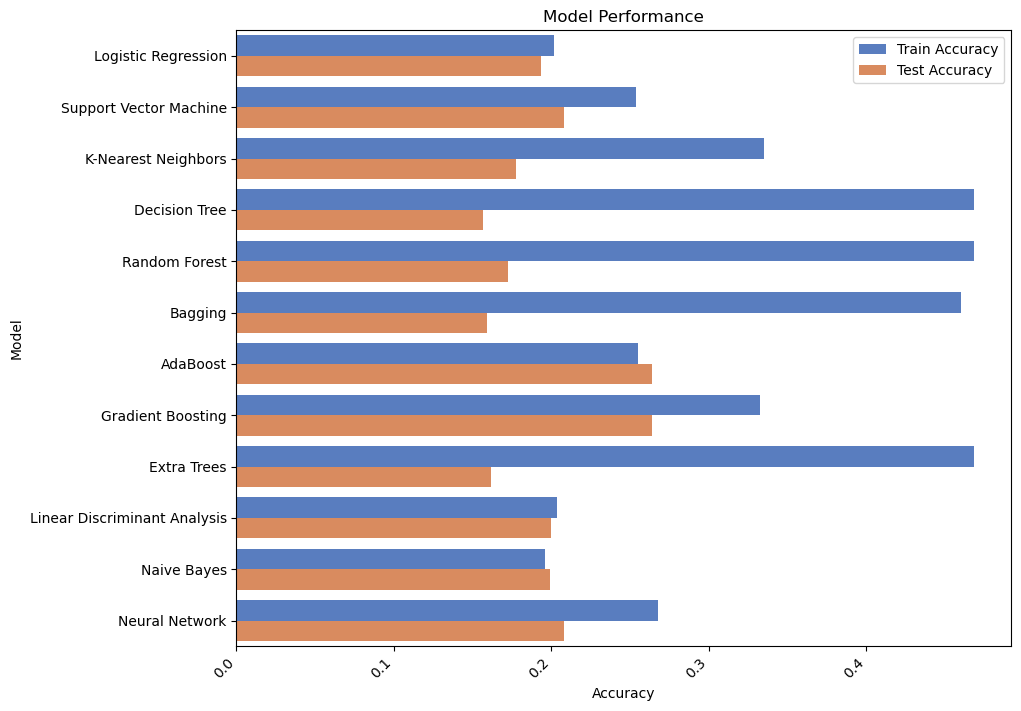

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Define dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(),
    #'XGBoost': XGBClassifier(),
    #'LightGBM': LGBMClassifier(),
    #'CatBoost': CatBoostClassifier(logging_level='Silent')
}

# Loop through models and print train and test accuracy
for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    
    # Predict on training data
    X_train_prediction = model.predict(X_train)
    train_acc = accuracy_score(X_train_prediction, Y_train)
    print(f'{name}:\nTrain Accuracy: {train_acc:.4f}')
    
    # Predict on testing data
    y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_pred, Y_test)
    print(f'Testing Accuracy: {test_acc:.4f}\n')
    import seaborn as sns
import matplotlib.pyplot as plt

# Lists to store model names, training accuracies, and testing accuracies
model_names = []
train_accuracies = []
test_accuracies = []

# Loop through models and calculate accuracies
for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    
    # Predict on training data
    X_train_prediction = model.predict(X_train)
    train_acc = accuracy_score(X_train_prediction, Y_train)
    
    # Predict on testing data
    y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_pred, Y_test)
    
    # Append results to lists
    model_names.append(name)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Create a DataFrame for plotting
data = pd.DataFrame({'Model': model_names,
                     'Train Accuracy': train_accuracies,
                     'Test Accuracy': test_accuracies})

# Plotting the results using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(data=data.melt(id_vars='Model'), x='value', y='Model', hue='variable', palette='muted', orient='h')
plt.xlabel('Accuracy')
plt.title('Model Performance')
plt.legend(title=None)
# plt.gca().invert_yaxis()
plt.xticks(rotation=45, ha='right')
# Invert y-axis to display the models in descending order
plt.show()


In [91]:
vgyv

NameError: name 'vgyv' is not defined

In [ ]:
# import pandas as pd
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score





# # Initialize K-fold cross-validation
# k_folds = 30  # Define the number of folds
# kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# # Initialize a model (e.g., Logistic Regression)
# model = DecisionTreeClassifier()

# # Initialize lists to store evaluation metrics
# accuracy_scores = []

# # Perform K-fold cross-validation
# for train_index, test_index in kf.split(Xs):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
#     # Fit the model on the training data
#     model.fit(X_train, y_train)
    
#     # Predict on the test data
#     y_pred = model.predict(X_test)
    
#     # Calculate accuracy and store the result
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracy_scores.append(accuracy)

# # Calculate the average accuracy across all folds
# avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
# print("Average accuracy:", avg_accuracy)


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.pipeline import Pipeline


# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # Pipeline for preprocessing and modeling
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),  # Standardize features
#     ('classifier', RandomForestClassifier(random_state=42))  # RandomForest classifier
# ])

# # Hyperparameter tuning using GridSearchCV
# param_grid = {
#     'classifier__n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'classifier__max_depth': [None, 10, 20],       # Maximum depth of the tree
#     'classifier__min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
#     'classifier__min_samples_leaf': [1, 2, 4],     # Minimum number of samples required at each leaf node
# }

# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Best hyperparameters
# print("Best parameters:", grid_search.best_params_)

# # Evaluate the model on the training set
# y_train_pred = grid_search.predict(X_train)
# train_accuracy = accuracy_score(y_train, y_train_pred)
# print("Training accuracy:", train_accuracy)

# # Evaluate the model on the testing set
# y_test_pred = grid_search.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print("Testing accuracy:", test_accuracy)

# # Classification report on the testing set
# print("Classification report:")
# print(classification_report(y_test, y_test_pred))


In [ ]:
# import pandas as pd
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report



# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

# # Apply SMOTE to the training data
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Train a classifier (e.g., RandomForest) on the resampled training data
# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the testing data
# y_pred = clf.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Print classification report
# print(classification_report(y_test, y_pred))


# Here Decision Tree is good in terms of training and testing accuracy

In [ ]:
uubibbu

In [ ]:
model= DecisionTreeClassifier()

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
X_train_prediction=model.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
training_accuracy

In [ ]:
X_testing_prediction=model.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [ ]:
testing_accuracy

In [ ]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=model.classes_, xticklabels=model.classes_)

In [ ]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

In [ ]:
from sklearn import metrics
# Print the confusion matrix

metrics.confusion_matrix(Y_test, X_testing_prediction)

In [ ]:
# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

In [ ]:
# making a predictive System
input_data=X.iloc[28]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=Std.transform(std_data)
#print(std_data)
#std_data=scalers.transform(std_data)
print(std_data)
prediction=model.predict(std_data)#model=decision tree
print("MadrsScore prediction:",prediction)
if prediction>=0 and prediction<=6:
    print("Patient is in normal state means no depression")
elif prediction>=7 and prediction<=19:
    print("Patient is suffering from mild level Depression")
elif prediction>=20 and prediction<=34:
    print("Patient is suffering from moderate level Depression")
elif prediction>=35 and prediction<=59:
    print("Patient is suffering from severe level Depression")
elif prediction>=60:
    print("Patient is suffering from very severe level Depression")

In [ ]:
X.head()

In [ ]:
Y.head(600)

In [ ]:
bibb

# Now i want to make second model.In this model i Will take afftype as a target attribute and predict whether a person is suffering from bipolar II,unipolar depressive,bipolar I

In [ ]:
md=kk.copy()

In [ ]:
md=md.drop(['madrs2'],axis=1)

In [ ]:
md

In [ ]:
X=md.drop('afftype',axis=1)
Y=md['afftype']

In [ ]:
X.shape,Y.shape

In [ ]:
#import imblearn


In [ ]:
# import library
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

# Fit and transform your dataset
X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [ ]:
X_resampled.shape, y_resampled.shape

In [ ]:
y_resampled.value_counts()

In [ ]:
X,Y=X_resampled,y_resampled

In [ ]:
X.shape,Y.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [ ]:
Xs

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Std=StandardScaler()
Xs=Std.fit_transform(Xs)

In [ ]:
Xs

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.225,stratify=Y,random_state=42)

In [ ]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(y_pred, Y_test)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}')

In [ ]:
#Decision Tree is good in terms of both training and testing score
modelkk=DecisionTreeClassifier()

In [ ]:
modelkk.fit(X_train,Y_train)

In [ ]:
X_train_prediction=modelkk.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
training_accuracy

In [ ]:
X_testing_prediction=modelkk.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [ ]:
testing_accuracy

In [ ]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=modelkk.classes_, xticklabels=modelkk.classes_)

In [ ]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

In [ ]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Decision Tree ')

In [ ]:
# making a predictive System for testing the data
# making a predictive System
input_data=X.loc[17]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=Std.transform(std_data)
print(std_data)
prediction=modelkk.predict(std_data)#model=Decision Tree
print("target:",prediction)
if(prediction==1):
    print("The Person is suffering from the depression type : bipolar II")
elif(prediction==2):
    print("The Person is suffering from the depression type :unipolar depressive")
elif(prediction==3):
    print("The Person is suffering from the depression type :bipolar I")

In [ ]:
X.tail(40)

In [ ]:
Y.head(300)

# Now i want to make third model.In this model i Will check whether the medical(depression) condition will improved or not after treatment.for this i will subtract madrs2-madrs1 and store in new columns name as target. except this columns all acts as features for training the model

In [ ]:
jp=kk.copy()

In [ ]:
jp

In [ ]:
jp['madrs1']=jp['madrs1'].astype('category').astype('int')

In [ ]:
jp['madrs2']=jp['madrs2'].astype('category').astype('int')

In [ ]:
jp['result']=jp['madrs2'] - jp['madrs1']

In [ ]:
jp.head(40)

In [ ]:
jp['madrs2']=jp['madrs2'].astype('int').astype('category')

In [ ]:
jp['madrs1']=jp['madrs1'].astype('int').astype('category')

In [ ]:
jp['result']=jp['result'].astype('int').astype('category')

In [ ]:
jp

In [ ]:
X=jp.drop(['result'],axis=1)

In [ ]:
Y=jp['result']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [ ]:
Xs

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Std=StandardScaler()
Xs=Std.fit_transform(Xs)

In [ ]:
Xs

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.18,random_state=102)

In [ ]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(y_pred, Y_test)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}')

# Here Decision Tree is good in terms of training and testing accuracy

In [ ]:
#Decision Tree is good in terms of both training and testing score
models=DecisionTreeClassifier()

In [ ]:
models.fit(X_train,Y_train)

In [ ]:
X_train_prediction=models.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
training_accuracy

In [ ]:
X_testing_prediction=models.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [ ]:
testing_accuracy

In [ ]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=model.classes_, xticklabels=model.classes_)

In [ ]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

In [ ]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Decision Tree')

In [ ]:
# making a predictive System for testing the data
# making a predictive System
input_data=X.iloc[384]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=Std.transform(std_data)
print(std_data)
prediction=models.predict(std_data)#model=Decision Tree
print("target:",prediction)
if(prediction <0):
    print("Patient Medical(depression) Condition has been improved after treatment ")
elif(prediction>0):
    print("Patient Medical(depression) Condition  become drastic  after treatment   ")
elif(prediction==0):
    print("Patient medical(depression) condition is neither be improved nor become drastic")

In [ ]:
X.head(15)

In [ ]:
Y.head(400)

# Now i want too design fourth machine learning model in which i will take melanch as target attributes and rest of the columns as features for training the machine learning model.

In [ ]:
jp=jp.drop('result',axis=1)

In [ ]:
jp.shape

In [ ]:
jp.groupby('melanch').size()

In [ ]:
X=jp.drop('melanch',axis=1)
Y=jp['melanch']

In [ ]:
# import library
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

# Fit and transform your dataset
X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [ ]:
X_resampled.shape, y_resampled.shape

In [ ]:
X,Y=X_resampled,y_resampled

In [ ]:
X.shape,Y.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [ ]:
Xs

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Std=StandardScaler()
Xs=Std.fit_transform(Xs)

In [ ]:
Xs

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.27,random_state=72)

In [ ]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(y_pred, Y_test)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}')

# I will take Random forest for model training

In [ ]:
modelss= RandomForestClassifier()

In [ ]:
modelss.fit(X_train,Y_train)

In [ ]:
X_train_prediction=modelss.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
training_accuracy

In [ ]:
X_testing_prediction=modelss.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [ ]:
testing_accuracy

In [ ]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=modelss.classes_, xticklabels=modelss.classes_)

In [ ]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

In [ ]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Random Forest ')

In [ ]:
# making a predictive System for testing the data
# making a predictive System
input_data=X.iloc[95]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=Std.transform(std_data)
print(std_data)
prediction=modelss.predict(std_data)#model=Random Forest Tree
print("target:",prediction)
if(prediction ==1):
    print("person is suffering from melancholia ")
elif(prediction==2):
    print("person is not suffering from melancholia  ")

In [ ]:
X.head(15)

In [ ]:
Y.head(100)

# Now i want to design 5th machine learning model.in this model i will take work as target attributes and other features as trainingattributes for machine learning model

In [ ]:
jp.groupby('work').size()

In [ ]:
jp.groupby('work').count()

In [ ]:
X=jp.drop('work',axis=1)
Y=jp['work']

In [ ]:
# import library
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

# Fit and transform your dataset
X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [ ]:
X_resampled.shape, y_resampled.shape

In [ ]:
X,Y=X_resampled,y_resampled

In [ ]:
X.shape,Y.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [ ]:
Xs

In [ ]:
Std=StandardScaler()
Xs=Std.fit_transform(Xs)


In [ ]:
Xs

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.26,random_state=72)

In [ ]:
X.shape,X_train.shape,X_test.shape

In [ ]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(y_pred, Y_test)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}')

# I will take Decsion Tree  for model training

In [ ]:
modelpk= DecisionTreeClassifier()

In [ ]:
modelpk.fit(X_train,Y_train)

In [ ]:
X_train_prediction=modelpk.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
training_accuracy

In [ ]:
X_testing_prediction=modelpk.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [ ]:
testing_accuracy

In [ ]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=modelpk.classes_, xticklabels=modelpk.classes_)

In [ ]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

In [ ]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Decision Tree ')

In [ ]:
# making a predictive System for testing the data
# making a predictive System
input_data=X.iloc[14]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=Std.transform(std_data)
print(std_data)
prediction=modelpk.predict(std_data)#model=Decision Tree
print("target:",prediction)
if(prediction ==1):
    print("working or studying ")
elif(prediction==2):
    print("unemployed/sick leave/pension)  ")

In [ ]:
X.head(15)

In [ ]:
Y.head(15)

# Now i want to design sixth machine learning model.in this model i will take marriage as target attributes and rest as training attributes for machine learning model

In [ ]:
 jp.groupby('marriage').size()

In [ ]:
X=jp.drop('marriage',axis=1)
Y=jp['marriage']

In [ ]:
# # import library
# from imblearn.over_sampling import RandomOverSampler

# oversampler = RandomOverSampler(random_state=42)

# # Fit and transform your dataset
# X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [ ]:
# X,Y=X_resampled,y_resampled

In [ ]:
X.shape,Y.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [ ]:
Xs

In [ ]:
from sklearn.preprocessing import StandardScaler
Std=StandardScaler()
Xs=Std.fit_transform(Xs)

In [ ]:
Xs

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.221,random_state=72)

In [ ]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(y_pred, Y_test)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}')

In [ ]:
modelsk= RandomForestClassifier()


In [ ]:
modelsk.fit(X_train,Y_train)

In [ ]:
X_train_prediction=modelsk.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
training_accuracy

In [ ]:
X_testing_prediction=modelsk.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [ ]:
testing_accuracy


In [ ]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=modelsk.classes_, xticklabels=modelsk.classes_)

In [ ]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

In [ ]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Random Forest')

In [ ]:
# making a predictive System for testing the data
# making a predictive System
input_data=X.iloc[8]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=Std.transform(std_data)
print(std_data)
prediction=modelsk.predict(std_data)#model=Decision Tree
print("target:",prediction)
if(prediction ==1):
    print(" married or cohabiting ")
elif(prediction==2):
    print("Single  ")

In [ ]:
Y

# Now i want to design seventh machine learning model.in this model i will take inpatient as target attributes and rest as training attributes for machine learning model

In [ ]:
jp.groupby('inpatient').size()

In [ ]:
jp.groupby('inpatient').count()

In [ ]:
X=jp.drop('inpatient',axis=1)
Y=jp['inpatient']

In [ ]:
# import library
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

# Fit and transform your dataset
X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [ ]:
X_resampled.shape, y_resampled.shape

In [ ]:
X,Y=X_resampled,y_resampled

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [ ]:
from sklearn.preprocessing import StandardScaler
Std=StandardScaler()
Xs=Std.fit_transform(Xs)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.21,random_state=72,stratify=Y)

In [ ]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(y_pred, Y_test)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}')

In [ ]:
modelak= RandomForestClassifier()

In [ ]:
modelak.fit(X_train,Y_train)

In [ ]:
X_train_prediction=modelak.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:

training_accuracy

In [ ]:
X_testing_prediction=modelak.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [ ]:
testing_accuracy

In [ ]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=modelak.classes_, xticklabels=modelak.classes_)

In [ ]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

In [ ]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Random Forest')

In [ ]:
# making a predictive System for testing the data
# making a predictive System
input_data=X.iloc[19]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=Std.transform(std_data)
print(std_data)
prediction=modelak.predict(std_data)#model=Decision  Tree
print("target:",prediction)
if(prediction ==1):
    print(" Inpatient ")
elif(prediction==2):
    print("Outpatient  ")

In [ ]:
Y.head(20)

In [ ]:
X